## Consumo de Energia Elétrica no Brasil: Análise Exploratória e Insights

#### Nome: Felipe Ioavasso Vieira dos Santos

## Introdução

Este estudo tem como objetivo analisar o consumo de energia elétrica no Brasil ao longo dos anos, utilizando dados detalhados sobre o consumo por diferentes tipos de consumidores e estados brasileiros.
A análise desses dados permitirá entender tendências de consumo, identificar padrões regionais e temporais, além de avaliar o impacto de políticas públicas e eventos econômicos no setor elétrico.

## Objetivo do Trabalho

O trabalho será estruturado em quatro etapas principais:

1. **Coleta, Limpeza e Análise Exploratória de Dados (AED)**: Importação, exploração e tratamento dos dados para garantir sua qualidade.
2. **Criação de Funções de Visualização e Análise Gráfica**: Desenvolvimento de funções dinâmicas para gerar insights visuais.
3. **Interpretação e Documentação dos Dados**: Análise crítica dos resultados e justificativa das visualizações escolhidas.
4. **Síntese dos Principais Insights**: Consolidação das descobertas e sugestões para aplicação prática.

## Ferramentas Utilizadas

#### Bibliotecas

- **Pandas**: Manipulação e análise de dados.  
- **Matplotlib e Seaborn**: Criação de gráficos e visualizações detalhadas.  
- **Plotly**: Construção de gráficos interativos para melhor exploração dos dados.  
- **Scikit-learn (KMeans)**: Aplicação de técnicas de clustering para identificar padrões nos dados.

#### Datasets

Raw data:
* consumo_energia_eletrica.csv
* estado_regiao.csv

Cleaned data:
* dataset  
O que contém cada dataset?

* df_consumo_total  
Possui todos os registros do tipo total.

* df_consumo_cativo  
Possui todos os registros do tipo cativo.

* df_consumo_com_regioes  
Inclui todos os registros do tipo_consumo:  
['Total' 'Cativo' 'Outros' 'Comercial' 'Industrial' 'Residencial'].

* df_consumo_outros  
Possui os registros ['Outros' 'Comercial' 'Industrial' 'Residencial'].  

** EM NENHUM DESSES DATASETS HÁ REGISTROS DUPLICADOS.


## Bibliotecas

In [1]:
# Bibliotecas para manipulação e análise de dados
import pandas as pd

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Biblioteca para aprendizado de máquina
from sklearn.cluster import KMeans


## Coleta de Dados

A primeira etapa do trabalho foi a coleta dos dados. Para isso, utilizamos uma interface gráfica desenvolvida em Python com Tkinter, que permite carregar arquivos CSV de forma interativa. A função `carregar_e_exibir_csv` foi criada para carregar o arquivo.

### Passos realizados:
- **Interface gráfica**: Foi criada uma interface com Tkinter para permitir a seleção de um arquivo CSV, o usuário também pode especificar o separador e a codificação do arquivo.
- **Carregamento do CSV**: Através do Pandas, o arquivo CSV é lido e convertido em um DataFrame.
- **Exibição dos dados**: O conteúdo do CSV é exibido na interface gráfica, utilizando o componente `Treeview` do Tkinter. Isso facilita a visualização das primeiras linhas do arquivo.
- **Envio para o Jupyter**: Após carregar o arquivo, o DataFrame é enviado para o Jupyter Notebook, onde o usuário pode iniciar a análise.


## Carregando Raw Data

Carregando os dois datasets disponibilizados para a atividade:
* estado_regiao.csv
* consumo_energia_eletrica.csv

### df_estados

In [ ]:
### Código de Coleta de Dados
from csv_loader_gui import carregar_e_exibir_csv

# Chama a interface gráfica e retorna o DataFrame
df_estados = carregar_e_exibir_csv()

# Verifica o conteúdo do DataFrame
if df_estados is not None:
    print("Dados carregados com sucesso!")
else:
    print("Nenhum arquivo foi carregado.")

### df_consumo_energia

In [ ]:
### Código de Coleta de Dados
from csv_loader_gui import carregar_e_exibir_csv

# Chama a interface gráfica e retorna o DataFrame
df_consumo_energia = carregar_e_exibir_csv()

# Verifica o conteúdo do DataFrame
if df_consumo_energia is not None:
    print("Dados carregados com sucesso!")
else:
    print("Nenhum arquivo foi carregado.")

## Como Ativar a Visualização dos Datasets no Streamlit

Para ativar a visualização da aplicação Streamlit, siga os passos abaixo:

1. **Acesse o Diretório do Arquivo**
   
   Abra o terminal e navegue até a pasta onde o arquivo `streamlit_analysier_data.py` está localizado. Para isso, use o comando `cd` (mudar diretório) para acessar o caminho correto da pasta. Exemplo:

   ```bash 
   cd /caminho/para/a/pasta/do/arquivo/streamlit_analysier_data.py

2. Execute o Comando do Streamlit

   Uma vez no diretório correto, execute o seguinte comando para rodar o aplicativo Streamlit:
   streamlit run streamlit_analysier_data.py

3. Acessando a Aplicação

   Após rodar o comando, o Streamlit abrirá automaticamente a aplicação em seu navegador padrão. Caso não abra automaticamente, você poderá acessar manualmente o endereço abaixo em qualquer navegador:
   http://localhost:8501


## Análise Inicial dos Dados de Consumo de Energia

Para entender melhor a abrangência temporal dos dados, verifiquei alguns dados presentes no conjunto de dados:

Quais os valores contidos em 'ano'?

In [ ]:
# Valores únicos na coluna 'ano'
anos_unicos = df_consumo_energia['ano'].unique()
print("Valores únicos na coluna 'ano':", anos_unicos)

Quais os valores contidos em 'tipo_consumo'?

In [ ]:
# Valores únicos na coluna 'tipo_consumo'
tipos_consumos_unicos = df_consumo_energia['tipo_consumo'].unique()
print("Valores únicos na coluna 'tipos_consumo':", tipos_consumos_unicos)

Qual a quantidade de Estados únicos?

In [ ]:
# Contar a quantidade estados únicos
quantidade_estados = df_consumo_energia['sigla_uf'].nunique()
print("Quantidade de estados únicos:",quantidade_estados)

Quais classes de 'tipo_consumo' que possuem valores NaN em 'numero_consumidores'?

In [ ]:
# Filtrar os tipos de consumo que possuem valores NaN na coluna 'numero_consumidores'
tipos_com_nan = df_consumo_energia[df_consumo_energia['numero_consumidores'].isna()]['tipo_consumo'].unique()

print("Tipos de consumo com valores NaN na coluna 'numero_consumidores':", tipos_com_nan)


Todos os registros do tipo_consumo 'Cativo' são NaN no 'numero_consumidores'?

In [ ]:
# Filtrar os dados para o tipo "Cativo"
df_cativo = df_consumo_energia[df_consumo_energia['tipo_consumo'] == 'Cativo']

# Separar os dados em dois grupos
df_cativo_nan = df_cativo[df_cativo['numero_consumidores'].isna()]
df_cativo_not_nan = df_cativo[df_cativo['numero_consumidores'].notna()]

# Agrupar por ano e somar o consumo
df_cativo_nan_ano = df_cativo_nan.groupby("ano")["consumo"].sum().reset_index()
df_cativo_not_nan_ano = df_cativo_not_nan.groupby("ano")["consumo"].sum().reset_index()

# Adicionar uma coluna para identificar os grupos
df_cativo_nan_ano["Grupo"] = "Cativo - Sem número de consumidores"
df_cativo_not_nan_ano["Grupo"] = "Cativo - Com número de consumidores"

# Concatenar os DataFrames para facilitar o gráfico
df_comparacao = pd.concat([df_cativo_nan_ano, df_cativo_not_nan_ano])

# PRINTS PARA VERIFICAÇÃO
print("=== Registros com numero_consumidores NaN ===")
print(df_cativo_nan.head())

print("\n=== Registros com numero_consumidores Preenchidos ===")
print(df_cativo_not_nan.head())

# Criar gráfico interativo
fig = px.line(
    df_comparacao, 
    x="ano", 
    y="consumo", 
    color="Grupo",
    title="Comparação do Consumo de Energia - Cativos com e sem número de consumidores",
    labels={"ano": "Ano", "consumo": "Consumo (kWh)", "Grupo": "Tipo de Cativo"},
    markers=True
)

fig.update_layout(template="plotly_dark")
fig.show()


Algumas observações importantes até aqui:

* Essas análises iniciais me permitem compreender melhor a estrutura e a abrangência dos dados, facilitando as próximas etapas do processamento  e da análise estatística.

* A queda no consumo a partir de 2015 reflete os impactos da portabilidade da conta de energia, evidenciando mudanças no comportamento do mercado.

* Dado que a tarifa do consumo "Cativo" é regulado pelo governo, diferentemente do mercado livre de energia e por não haver dados de número de consumidores optei por analisá-lo separadamente. 

* Os registros do tipo de consumo 'Total' serão excluídos.

* Os registros duplicados também serão excluídos.

## Tratamento dos dados

Nessa etapa envolve em retirar os registros duplicados e criar novos dataframes.

In [ ]:
# Remover registros duplicados
df_consumo_energia_not_rep = df_consumo_energia.drop_duplicates()

### Unindo arquivos

Criação de um dataframe temporário para poder manusear o novo dataframe.

In [ ]:
# Configurando o pandas para mostrar todas as colunas
pd.set_option('display.max_columns', None)

In [ ]:
# Realizando o merge
df_merged = df_consumo_energia.merge(df_estados, left_on="sigla_uf", right_on="sigla", how="left")

In [ ]:
# Salvando o arquivo
df_merged.to_csv("consumo_com_regioes.csv", index=False)

## Novos Dataframes

Os novos dataframes serão:

* df_consumo_cativo
Possui todos os registros do tipo cativo.

* df_consumo_com_regioes
Inclui todos os registros do tipo_consumo:
['Total' 'Cativo' 'Outros' 'Comercial' 'Industrial' 'Residencial'].

* df_consumo_outros
Possui os registros ['Outros' 'Comercial' 'Industrial' 'Residencial'].

### Separar em arquivos .CSV diferentes

Aqui já aproveito o df_merged para separar os datasets. 

In [ ]:
# Remover registros duplicados
df_consumo_energia_not_rep = df_merged.drop_duplicates()

# Criar DataFrame apenas com "Cativo"
df_consumo_cativo = df_consumo_energia_not_rep[df_consumo_energia_not_rep["tipo_consumo"] == "Cativo"]

# Criar DataFrame com os outros tipos de consumo
df_consumo_outros = df_consumo_energia_not_rep[
    (df_consumo_energia_not_rep["tipo_consumo"] != "Total") &
    (df_consumo_energia_not_rep["tipo_consumo"] != "Cativo")
]

# Salvar os DataFrames em arquivos CSV
df_consumo_cativo.to_csv("consumo_cativo.csv", index=False)
df_consumo_outros.to_csv("consumo_outros.csv", index=False)

print("Arquivos salvos com sucesso!")


## Carregando os datasets

### df_consumo_cativo

In [2]:
### Código de Coleta de Dados
from csv_loader_gui import carregar_e_exibir_csv

# Chama a interface gráfica e retorna o DataFrame
df_consumo_cativo = carregar_e_exibir_csv()

# Verifica o conteúdo do DataFrame
if df_consumo_cativo is not None:
    print("Dados carregados com sucesso!")
else:
    print("Nenhum arquivo foi carregado.")

Dados carregados com sucesso!


### df_consumo_com_regioes

In [3]:
### Código de Coleta de Dados
from csv_loader_gui import carregar_e_exibir_csv

# Chama a interface gráfica e retorna o DataFrame
df_consumo_com_regioes = carregar_e_exibir_csv()

# Verifica o conteúdo do DataFrame
if df_consumo_com_regioes is not None:
    print("Dados carregados com sucesso!")
else:
    print("Nenhum arquivo foi carregado.")

Dados carregados com sucesso!


### df_consumo_outros

In [4]:
### Código de Coleta de Dados
from csv_loader_gui import carregar_e_exibir_csv

# Chama a interface gráfica e retorna o DataFrame
df_consumo_outros = carregar_e_exibir_csv()

# Verifica o conteúdo do DataFrame
if df_consumo_outros is not None:
    print("Dados carregados com sucesso!")
else:
    print("Nenhum arquivo foi carregado.")

Dados carregados com sucesso!


## Entendendo os dados

### Conhecendo o comportamento do mercado de energia não cativo

In [5]:
# Agrupar os dados por ano e tipo de consumo, somando os valores de consumo
df_evolucao = df_consumo_outros.groupby(["ano", "tipo_consumo"])["consumo"].sum().reset_index()

# Criar o gráfico interativo com Plotly
fig = px.line(
    df_evolucao,
    x="ano",
    y="consumo",
    color="tipo_consumo",
    markers=True,
    title="Evolução do Consumo ao Longo dos Anos",
    labels={"ano": "Ano", "consumo": "Consumo Total", "tipo_consumo": "Tipo de Consumo"}
)

# Personalizar layout
fig.update_layout(
    xaxis=dict(dtick=1),  # Mostrar todos os anos no eixo X
    template="plotly_white",  # Tema mais limpo e profissional
    hovermode="x unified"  # Mostrar valores de todos os tipos no hover
)

# Mostrar o gráfico
fig.show()

A escolha pelo gráfico de linha para verificar a evolução do mercado ao longo dos anos é mais acertada, permitindo visualizar tendências, identificar padrões sazonais e comparar variações ao longo do tempo de forma clara e intuitiva. Facilitando a análise do comportamento do mercado, destacando possíveis momentos de crescimento ou retração.

### Conhecendo o comportamento do mercado cativo

In [6]:
# Agrupar os dados por ano e tipo de consumo, somando os valores de consumo
df_evolucao = df_consumo_cativo.groupby(["ano", "tipo_consumo"])["consumo"].sum().reset_index()

# Criar o gráfico interativo com Plotly
fig = px.line(
    df_evolucao,
    x="ano",
    y="consumo",
    color="tipo_consumo",
    markers=True,
    title="Evolução do Consumo ao Longo dos Anos",
    labels={"ano": "Ano", "consumo": "Consumo Total", "tipo_consumo": "Tipo de Consumo"}
)

# Personalizar layout
fig.update_layout(
    xaxis=dict(dtick=1),  # Mostrar todos os anos no eixo X
    template="plotly_white",  # Tema mais limpo e profissional
    hovermode="x unified"  # Mostrar valores de todos os tipos no hover
)

# Mostrar o gráfico
fig.show()

### Consumo total de energia por estado

In [7]:
# Agrupar os dados por estado e somar o consumo total
df_consumo_estado = df_consumo_outros.groupby("sigla_uf")["consumo"].sum().reset_index()

# Ordenar os estados pelo consumo total
df_consumo_estado = df_consumo_estado.sort_values(by="consumo", ascending=False)

# Criar o gráfico de barras interativo com Plotly
fig = px.bar(
    df_consumo_estado,
    x="consumo",
    y="sigla_uf",
    orientation="h",  # Barras horizontais
    color="sigla_uf",  # Diferenciar as cores por estado
    color_continuous_scale="viridis",  # Paleta de cores semelhante ao Seaborn
    labels={"sigla_uf": "Estado", "consumo": "Consumo Total"},
    title="Consumo Total de Energia por Estado",
)

# Melhorar layout
fig.update_layout(
    xaxis_title="Consumo Total",
    yaxis_title="Estado",
    yaxis=dict(categoryorder="total ascending"),  # Ordena corretamente
    template="plotly_white",  # Estilo mais limpo
)

# Exibir o gráfico
fig.show()

escolhi o gráfico de barras nessa situação porque permite comparar de forma clara e direta o consumo total de energia entre os estados, destacando quais possuem os maiores e menores consumos. A disposição horizontal facilita a leitura dos rótulos dos estados, melhorando a visualização dos dados e a interatividade do Plotly possibilita explorar os valores com mais detalhes.

### Consumo total de energia por região

In [9]:
# Agrupar os dados por região e somar o consumo total
df_consumo_regiao = df_consumo_outros.groupby("regiao")["consumo"].sum().reset_index()

# Ordenar as regiões pelo consumo total
df_consumo_regiao = df_consumo_regiao.sort_values(by="consumo", ascending=False)

# Criar o gráfico de barras interativo com Plotly
fig = px.bar(
    df_consumo_regiao,
    x="consumo",
    y="regiao",
    orientation="h",  # Barras horizontais
    color="regiao",  # Diferenciar as cores por região
    color_continuous_scale="Viridis",  # Paleta de cores
    labels={"regiao": "Região", "consumo": "Consumo Total"},
    title="Consumo Total de Energia por Região",
)

# Melhorar layout
fig.update_layout(
    xaxis_title="Consumo Total",
    yaxis_title="Região",
    yaxis=dict(categoryorder="total ascending"),  # Ordena corretamente
    template="plotly_white",  # Estilo mais limpo
)

# Exibir o gráfico
fig.show()

A escolha pelo gráfico de barras é pela facilidade na leitura das informações neste gráfico

### Evolução do consumo de energia por região

In [10]:
# Agrupar os dados por ano e estado, somando o consumo total
df_consumo_ano_estado = df_consumo_outros.groupby(["ano", "sigla_uf", "regiao"])["consumo"].sum().reset_index()

# Garantir que o ano seja do tipo inteiro
df_consumo_ano_estado["ano"] = df_consumo_ano_estado["ano"].astype(int)

In [27]:
# Criar o gráfico interativo com Plotly Express
fig = px.line(
    df_consumo_ano_estado, 
    x="ano", 
    y="consumo", 
    color="sigla_uf", 
    facet_col="regiao",  # Criar subplots por região
    facet_col_wrap=2,  # Número de colunas de subplots
    markers=True,  # Adicionar marcadores
    title="Evolução do Consumo de Energia por Região",
    labels={"ano": "Ano", "consumo": "Consumo Total", "sigla_uf": "Estado"},
    color_discrete_sequence=px.colors.qualitative.Set1
)

# Melhorar layout
fig.update_layout(
    height=800,  # Ajustar altura do gráfico
    margin=dict(t=50, l=50, r=50, b=50),  # Margens
    legend_title="Estados",
    hovermode="x unified"  # Tooltip unificado ao passar o mouse
)

# Melhorar o eixo X (anos inteiros)
fig.update_xaxes(tickmode="array", tickvals=df_consumo_ano_estado["ano"].unique())

# Exibir gráfico interativo
fig.show()


Escolhi este método porque permite visualizar a evolução do consumo de energia ao longo dos anos de forma segmentada por região, facilitando a identificação de padrões e tendências em cada área geográfica. O uso de subplots por região melhora a organização da informação

### Evolução do consumo de energia por região - Ampliado

Vamos olhar mais detalhadamente para o comportamento. Desse modo temos que tomar atenção, pois, o eixo y não possui o mesmo range de amplitude no consumo total.

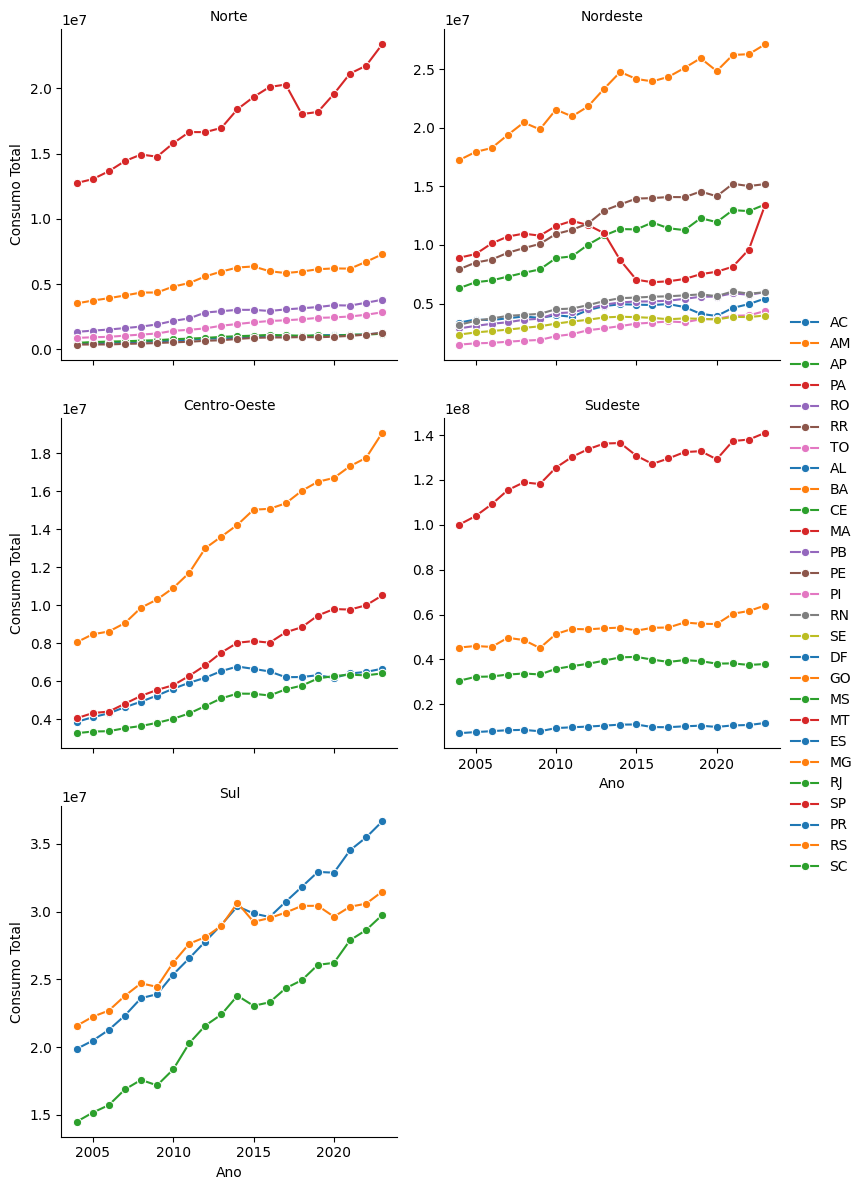

In [12]:
# Criar FacetGrid com subplots para cada região
g = sns.FacetGrid(df_consumo_ano_estado, col="regiao", col_wrap=2, sharey=False, height=4)
g.map_dataframe(sns.lineplot, x="ano", y="consumo", hue="sigla_uf", marker="o")

# Ajustes visuais
g.add_legend()
g.set_axis_labels("Ano", "Consumo Total")
g.set_titles("{col_name}")
plt.show()

A escolha deste é uma continuação da escolha acima. A diferença aqui é que podemos ver os movimentos mais detalhados do consumo de energia.

### Evolução do Consumo de Energia - Top 5 Estados

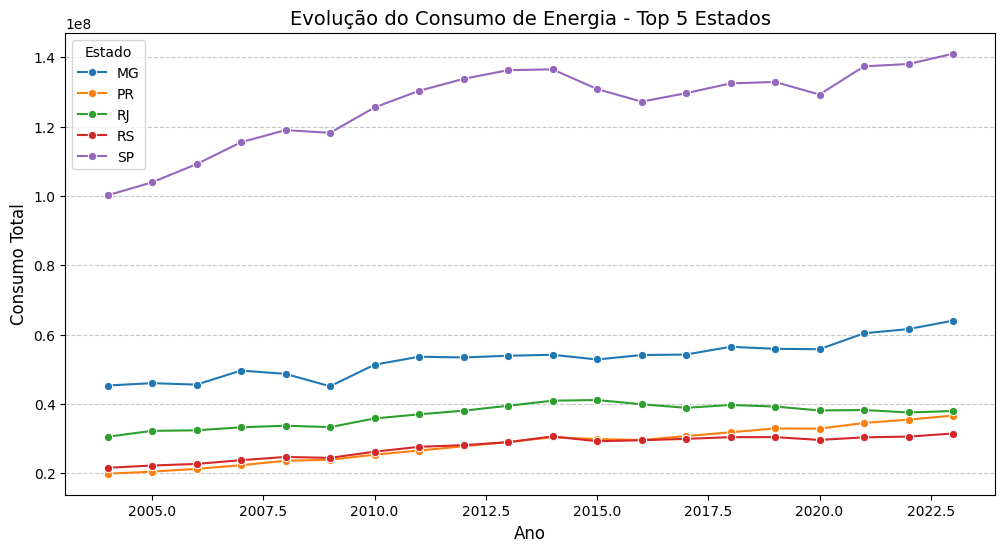

In [13]:
# Calcular o consumo médio por estado
top_estados = df_consumo_ano_estado.groupby("sigla_uf")["consumo"].mean().nlargest(5).index

# Filtrar apenas esses estados
df_top = df_consumo_ano_estado[df_consumo_ano_estado["sigla_uf"].isin(top_estados)]

# Criar gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top, x="ano", y="consumo", hue="sigla_uf", marker="o")

# Personalizar
plt.title("Evolução do Consumo de Energia - Top 5 Estados", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Consumo Total", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Estado")
plt.show()


o gráfico de linha é o melhor para demonstrar a evolução do consumo ao longo do tempo.

### Consumo de energia por região(2004 vs 2023)

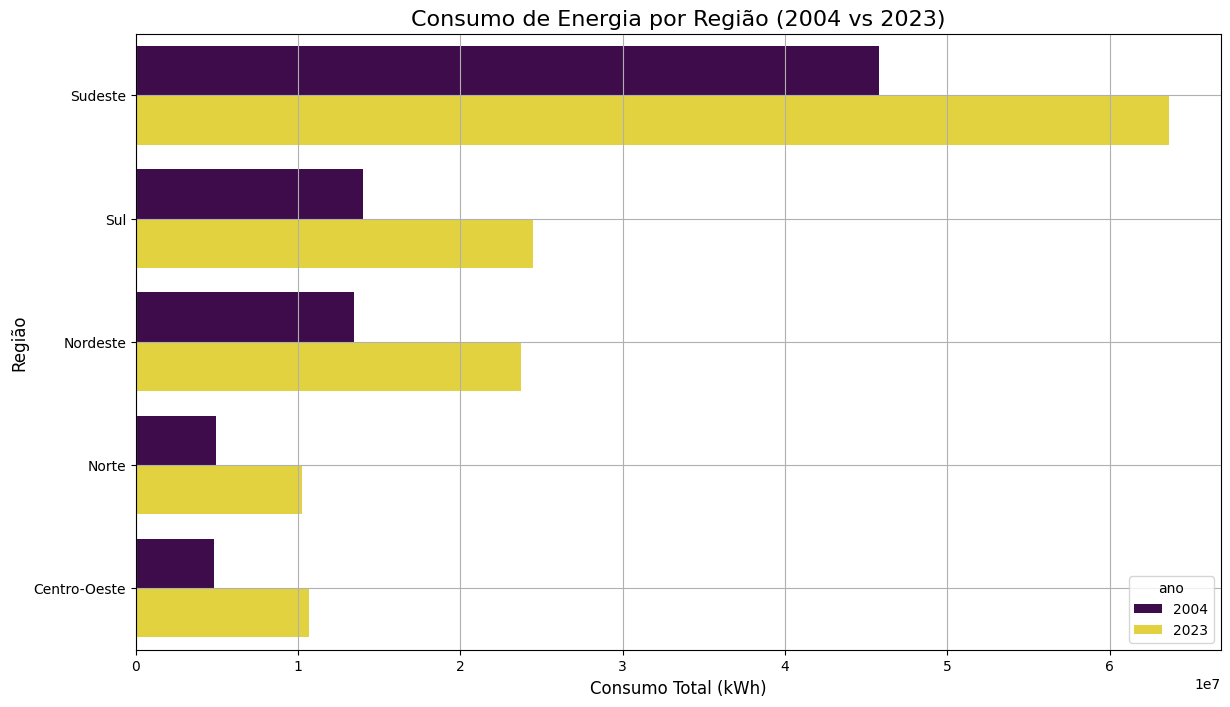

In [17]:
# Agrupar os dados por região, tipo de consumo e ano, somando o consumo total
df_consumo_regiao_tipo = df_consumo_outros.groupby(['regiao', 'tipo_consumo', 'ano'])['consumo'].sum().reset_index()

# Filtrar os dados para as regiões e anos de 2004 e 2023
regiao_2004_2023 = df_consumo_regiao_tipo[df_consumo_regiao_tipo['ano'].isin([2004, 2023])]

# Ordenar as barras de forma ascendente para cada região
regiao_2004_2023 = regiao_2004_2023.sort_values(by='consumo', ascending=False)

# Gráfico de barras horizontais para consumo por região em 2004 e 2023
plt.figure(figsize=(14, 8))
sns.barplot(data=regiao_2004_2023, x='consumo', y='regiao', hue='ano', palette='viridis', orient='h', errorbar=None)

# Personalizar o gráfico
plt.title("Consumo de Energia por Região (2004 vs 2023)", fontsize=16)
plt.xlabel("Consumo Total (kWh)", fontsize=12)
plt.ylabel("Região", fontsize=12)
plt.grid(True)

# Mostrar o gráfico
plt.show()

 Este gráfico permite comparar de forma clara a evolução do consumo de energia entre os anos de 2004 e 2023 em cada região. O uso de barras horizontais facilita a visualização das diferenças entre os períodos, enquanto a segmentação por cores destaca as mudanças ocorridas.

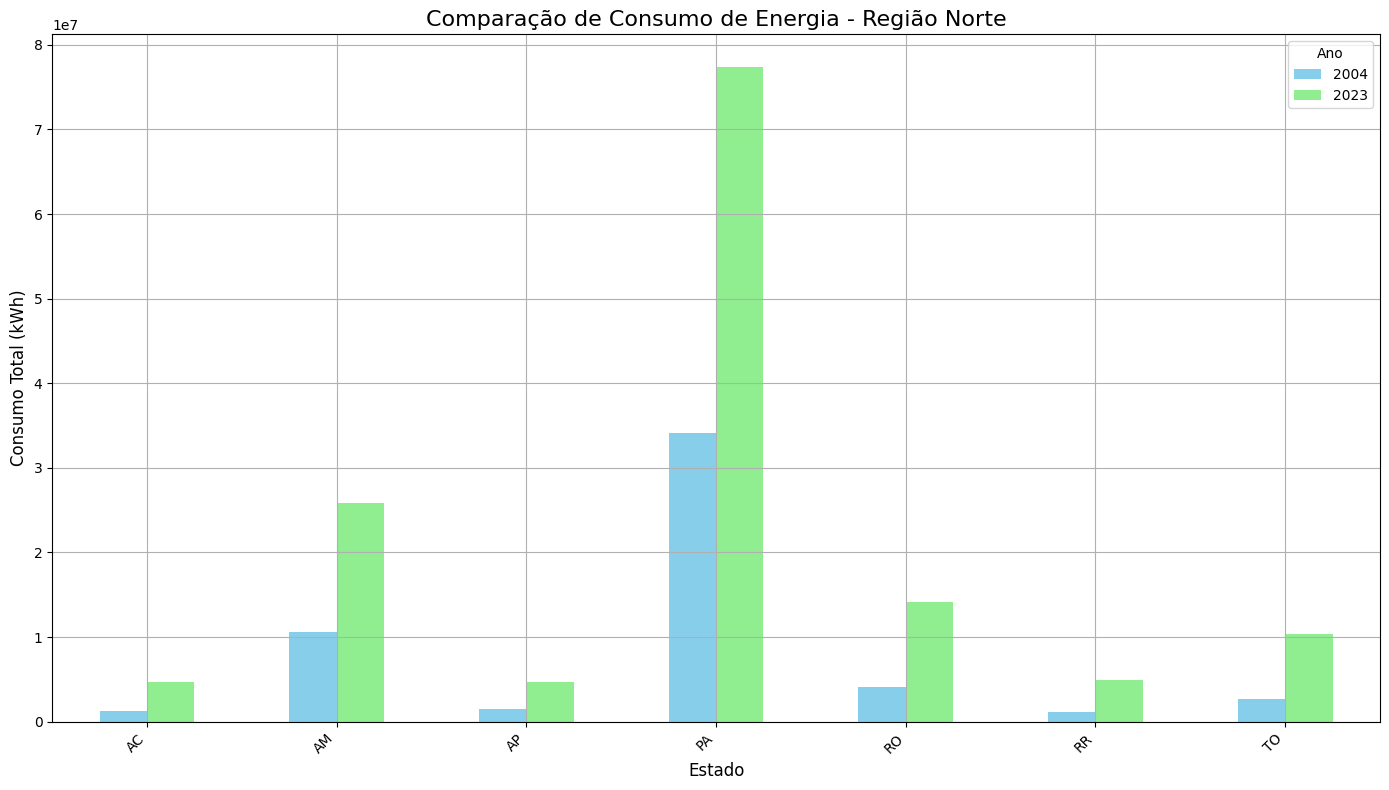

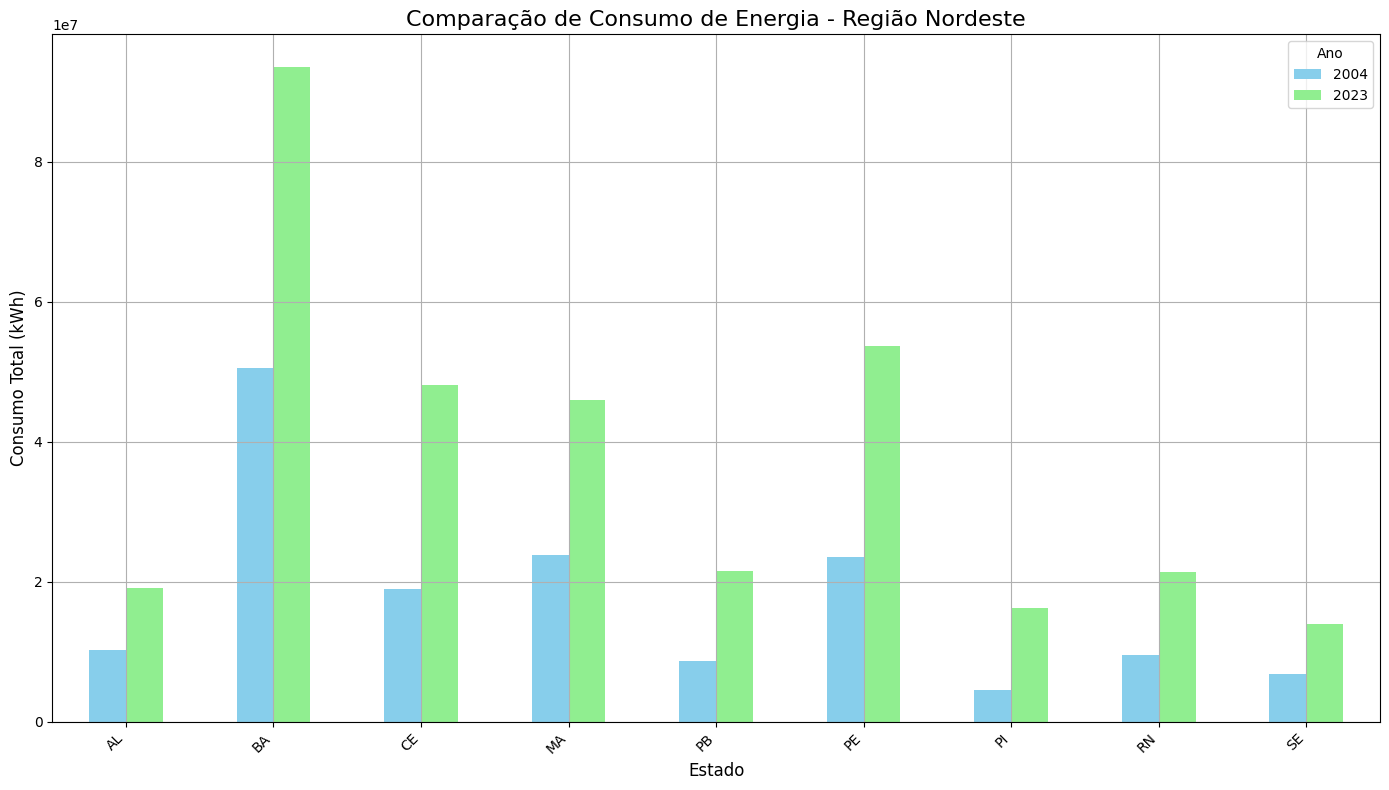

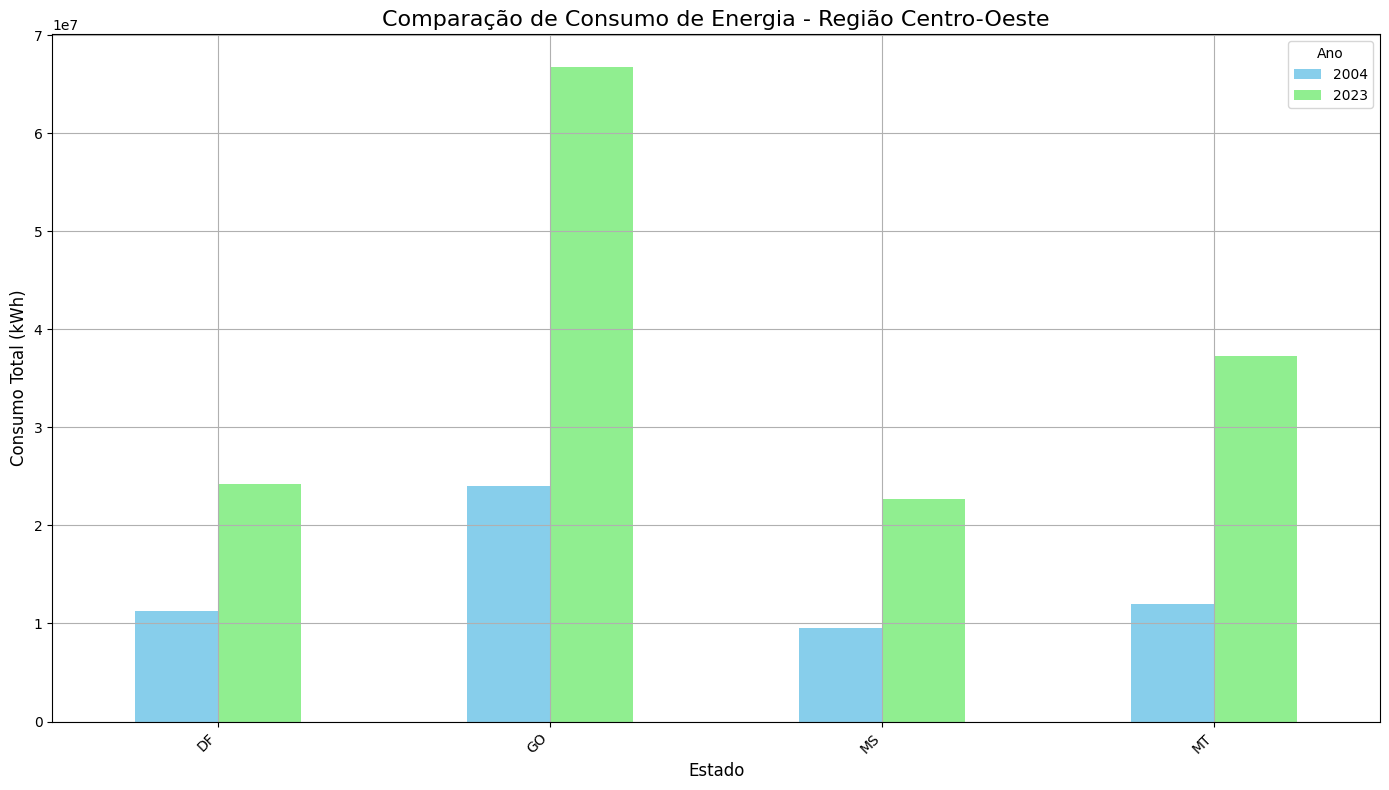

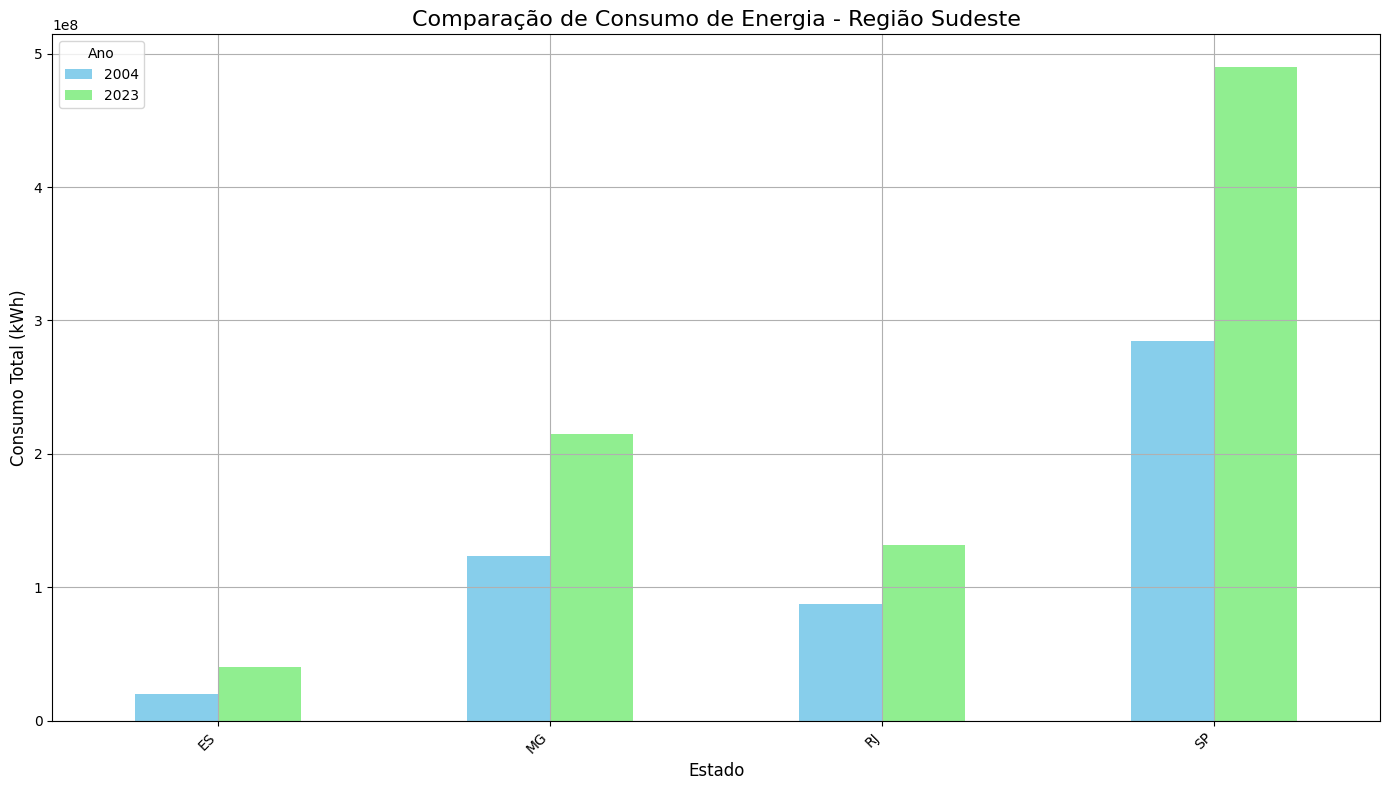

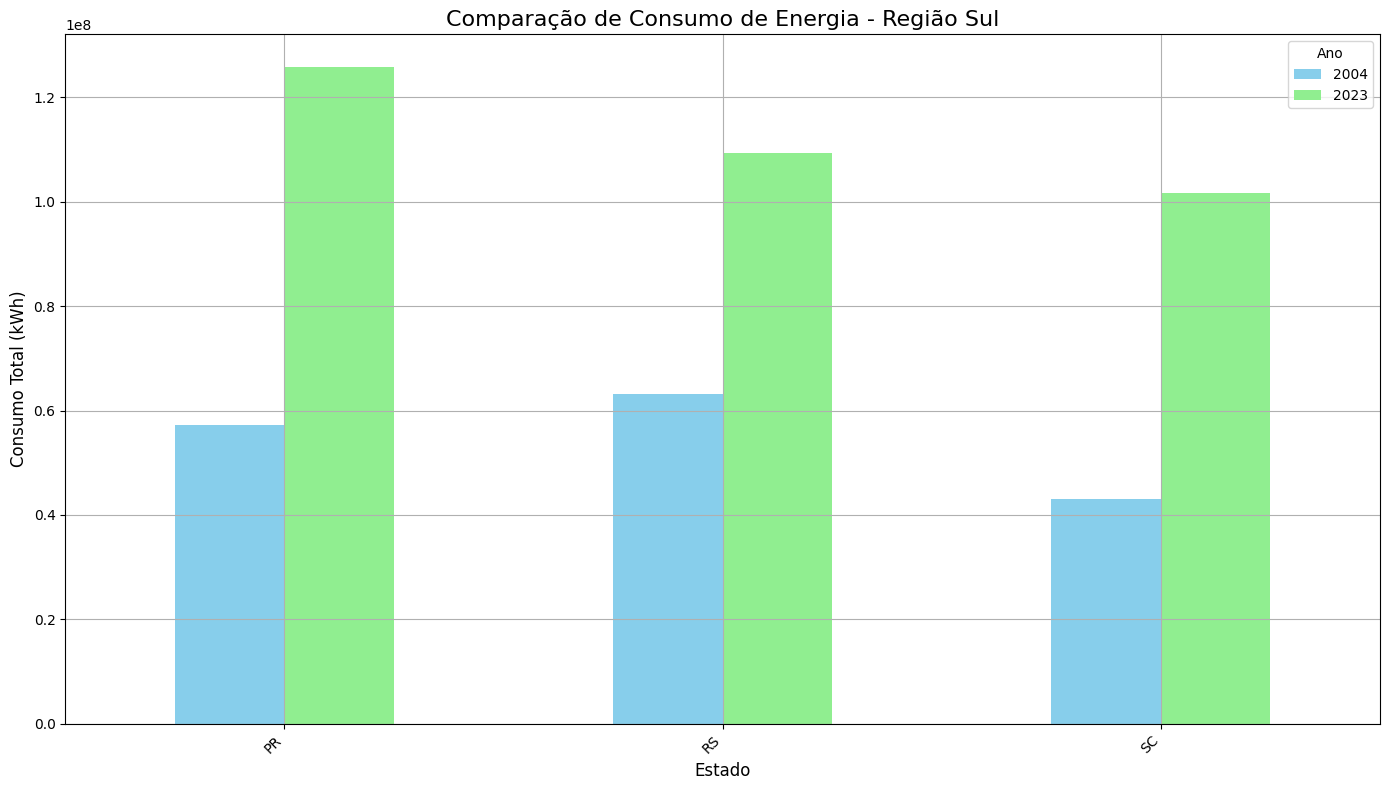

In [18]:
# Listando as regiões a serem analisadas
regioes_analisadas = ['Norte', 'Nordeste', 'Centro-Oeste', 'Sudeste', 'Sul']

# Criar um dicionário para armazenar as comparações
comparacoes = {}

# Para cada região, comparar o consumo do primeiro e do último ano
for regiao in regioes_analisadas:
    # Filtrando os dados para a região atual
    df_regiao = df_consumo_com_regioes[df_consumo_com_regioes['regiao'] == regiao]
    
    # Filtrando os dados para 2004 e 2023
    df_2004 = df_regiao[df_regiao['ano'] == 2004]
    df_2023 = df_regiao[df_regiao['ano'] == 2023]
    
    # Calcular o consumo total por estado em 2004 e 2023
    consumo_2004 = df_2004.groupby('sigla_uf')['consumo'].sum()
    consumo_2023 = df_2023.groupby('sigla_uf')['consumo'].sum()
    
    # Criar um DataFrame com os consumos de 2004 e 2023 para comparação
    df_comparacao = pd.DataFrame({'2004': consumo_2004, '2023': consumo_2023})
    
    # Armazenar no dicionário para posterior uso
    comparacoes[regiao] = df_comparacao

    """ # Mostrar as comparações por região
    print(f"\nComparação de Consumo - Região {regiao}:")
    print(f"Consumo em 2004:\n{consumo_2004}")
    print(f"Consumo em 2023:\n{consumo_2023}")
    print(f"Diferença de Consumo (2023 - 2004):\n{consumo_2023 - consumo_2004}") """

    # Gráfico de barras agrupadas para cada região
    df_comparacao.plot(kind='bar', figsize=(14, 8), color=['skyblue', 'lightgreen'])

    # Personalizar o gráfico
    plt.title(f"Comparação de Consumo de Energia - Região {regiao}", fontsize=16)
    plt.xlabel("Estado", fontsize=12)
    plt.ylabel("Consumo Total (kWh)", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Ano")
    plt.grid(True)
    
    # Mostrar o gráfico
    plt.tight_layout()
    plt.show()


### Taxa de crescimento entre o mercado cativo vs mercado não cativo

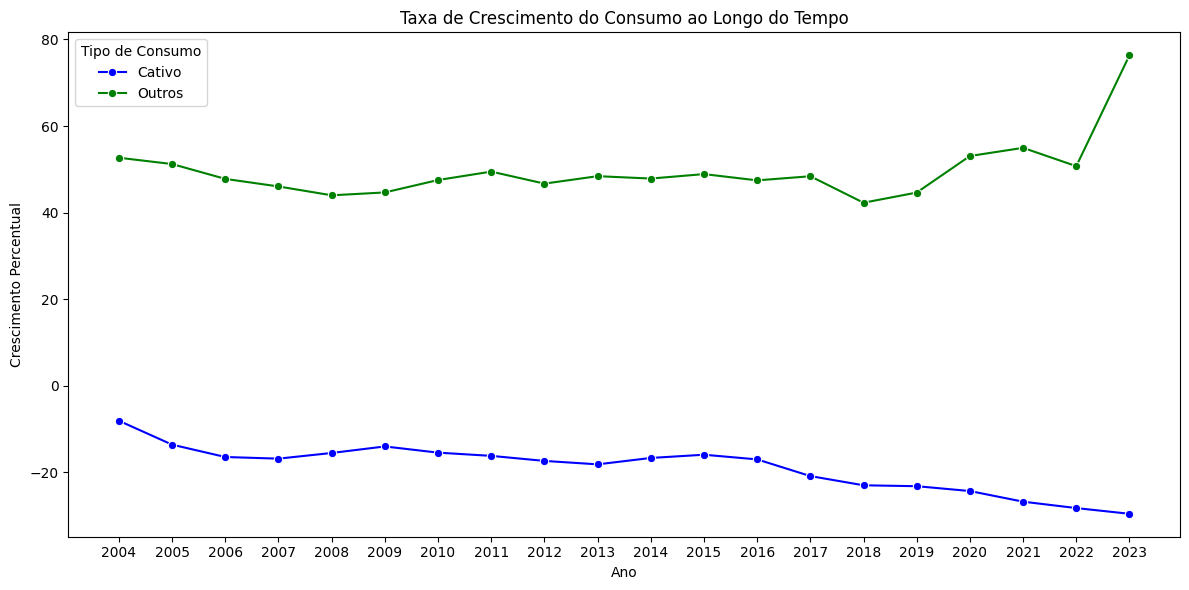

In [19]:
# Garantir que a coluna 'ano' seja do tipo inteiro
df_consumo_com_regioes['ano'] = df_consumo_com_regioes['ano'].astype(int)

# Ordenando os dados por ano e mês para calcular o crescimento corretamente
df_consumo_com_regioes = df_consumo_com_regioes.sort_values(by=['sigla_uf', 'ano', 'mes'])

# Calculando o crescimento percentual do consumo
df_consumo_com_regioes['crescimento_percentual'] = df_consumo_com_regioes.groupby('sigla_uf')['consumo'].pct_change() * 100

# Filtrando os dados para os tipos de consumo
df_cativo = df_consumo_com_regioes[df_consumo_com_regioes['tipo_consumo'] == 'Cativo']
df_outros_detalhado = df_consumo_com_regioes[~df_consumo_com_regioes['tipo_consumo'].isin(['Cativo', 'Total'])]

# Plotando a taxa de crescimento do consumo ao longo do tempo
plt.figure(figsize=(12, 6))

# Gráfico para Cativo
sns.lineplot(data=df_cativo, x='ano', y='crescimento_percentual', label='Cativo', color='blue', marker='o', errorbar=None)

# Gráfico para outros tipos de consumo
sns.lineplot(data=df_outros_detalhado, x='ano', y='crescimento_percentual', label='Outros', color='green', marker='o', errorbar=None)

# Títulos e rótulos
plt.title('Taxa de Crescimento do Consumo ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Crescimento Percentual')
plt.legend(title='Tipo de Consumo')

# Ajustando os ticks do eixo x para exibir o ano como inteiro
plt.xticks(ticks=range(df_consumo_com_regioes['ano'].min(), df_consumo_com_regioes['ano'].max()+1), labels=[str(int(year)) for year in range(df_consumo_com_regioes['ano'].min(), df_consumo_com_regioes['ano'].max()+1)])

# Exibindo o gráfico
plt.tight_layout()
plt.show()


O gráfico de linha foi a melhor escolha porque permite analisar a tendência do crescimento do consumo ao longo do tempo, facilitando a identificação de padrões e variações entre diferentes categorias.

### Verificando o comportamento de 2018 a 2023, englobando o período da pandemia de Covid-19

In [20]:
# Filtrando os dados de 2018 a 2023 e removendo registros com NaN no consumo
df_completo = df_consumo_com_regioes[df_consumo_com_regioes['ano'].between(2018, 2023)]
df_completo = df_completo.dropna(subset=['consumo'])

# Agrupar o consumo por região e ano
df_comparacao_tempo = df_completo.groupby(['ano', 'regiao'])['consumo'].sum().reset_index()

# Criando o gráfico interativo
fig = px.line(df_comparacao_tempo, 
              x='ano', 
              y='consumo', 
              color='regiao', 
              markers=True, 
              title="Evolução do Consumo de Energia (2018 a 2023) por Região - pandemia Covid-19",
              labels={'ano': 'Ano', 'consumo': 'Consumo Total (kWh)', 'regiao': 'Região'})

# Personalizar o layout
fig.update_layout(
    xaxis=dict(tickmode='array', tickvals=df_comparacao_tempo['ano'].unique(), tickangle=45),
    yaxis_title='Consumo Total (kWh)',
    legend_title='Região',
    title_font=dict(size=16),
    title_x=0.5
)

# Exibir o gráfico
fig.show()


O gráfico de linha interativo foi a melhor escolha porque mostra claramente a evolução do consumo de energia por região e permite destacar o impacto da pandemia.

### Scatterplot

Qual a relação entre número de consumidores e o consumo de energia?

Correlação entre Número de Consumidores e Consumo: 0.45


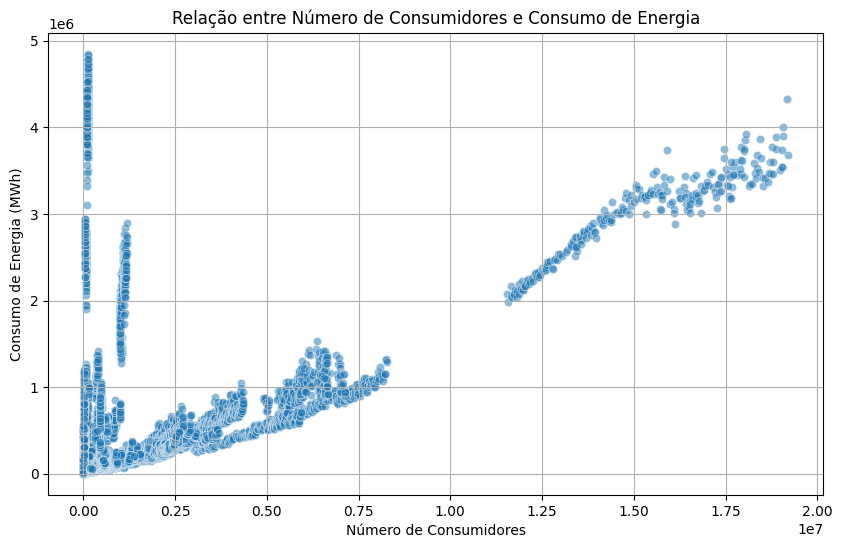

In [21]:
# Remover valores NaN para evitar distorções na análise
df_corr = df_consumo_outros.dropna(subset=["numero_consumidores", "consumo"])

# Calcular a correlação de Pearson
correlacao = df_corr["numero_consumidores"].corr(df_corr["consumo"])
print(f"Correlação entre Número de Consumidores e Consumo: {correlacao:.2f}")

# Criar um scatter plot para visualizar a relação entre as variáveis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_corr, x="numero_consumidores", y="consumo", alpha=0.5)

# Adicionar título e rótulos
plt.title("Relação entre Número de Consumidores e Consumo de Energia")
plt.xlabel("Número de Consumidores")
plt.ylabel("Consumo de Energia (MWh)")
plt.grid(True)

# Exibir o gráfico
plt.show()


* Existe uma correlação positiva geral entre o número de consumidores e o consumo de energia, mas a relação parece não ser linear em todas as faixas.
* Alguns pontos no lado esquerdo (baixo número de consumidores) têm um consumo muito alto, o que pode indicar outliers ou situações especiais, como grandes consumidores de energia em áreas com poucos consumidores residenciais.

Após analisar a relação entre o número de consumidores e o consumo de energia, apliquei o algoritmo K-Means para segmentar os dados em três clusters distintos. Após os resultado verifiquei que 3 segmentações não pareciam fazer sentido, tentei com 4 e depois 5 segmentações.  
Com 5 segmentações de n_clusters o resultado parece ser balanceado.

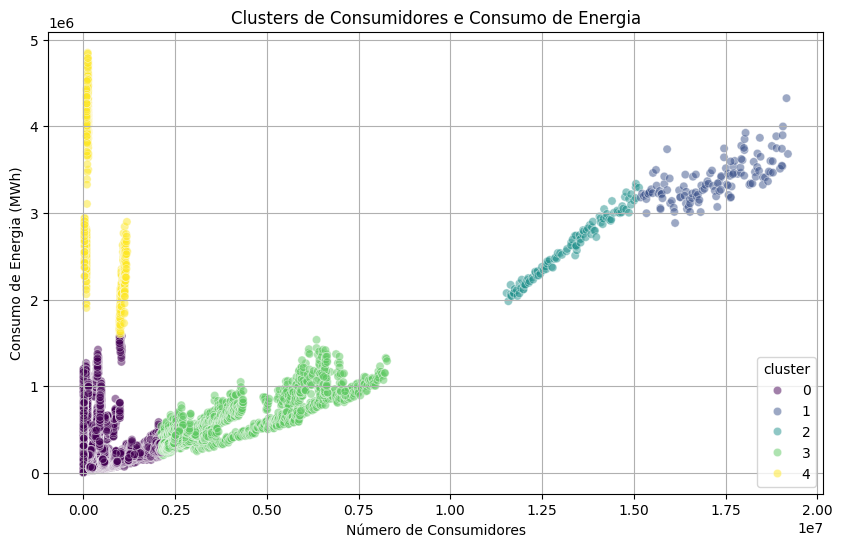

In [23]:
# Definir o número de clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df_corr["cluster"] = kmeans.fit_predict(df_corr[["numero_consumidores", "consumo"]])

# Visualizar os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_corr, x="numero_consumidores", y="consumo", hue="cluster", palette="viridis", alpha=0.5)
plt.title("Clusters de Consumidores e Consumo de Energia")
plt.xlabel("Número de Consumidores")
plt.ylabel("Consumo de Energia (MWh)")
plt.grid(True)
plt.show()


Após aplicar o algoritmo K-Means, adicionamos os rótulos dos clusters ao DataFrame original, permitindo uma análise mais detalhada de cada grupo identificado.

In [ ]:
# Adicionar os rótulos dos clusters ao DataFrame original
df_corr['cluster'] = kmeans.labels_

# Descrever os clusters
clusters_descricao = df_corr.groupby('cluster').agg({
    'numero_consumidores': ['mean', 'median', 'min', 'max'],
    'consumo': ['mean', 'median', 'min', 'max']
})

print(clusters_descricao)

Os centroides representam o ponto médio de cada cluster, ou seja, o centro das observações agrupadas pelo algoritmo K-Means.

In [24]:
# Obter os centroides dos clusters
centroides = kmeans.cluster_centers_

# Exibir os centroides
for i, centroide in enumerate(centroides):
    print(f"Cluster {i}: {centroide}")


Cluster 0: [253033.33895427 209996.09761397]
Cluster 1: [17174299.20769232  3382570.51538462]
Cluster 2: [13267790.40909092  2606848.80909091]
Cluster 3: [3983904.24697578  580310.0640121 ]
Cluster 4: [ 388759.20378457 3030111.68850072]


Agora que foi identificado os padrões de consumo e foi feita a segmentação dos dados em clusters, é atribuída os rótulos descritivos para facilitar a interpretação dos grupos:
* Cluster 0: numero_consumidores pequeno e consumo baixo → provavelmente "Pequenos Consumidores".
* Cluster 1: numero_consumidores muito alto e consumo elevado → "Grandes Consumidores".
* Cluster 2: valores intermediários → "Consumidores Médios".
* Cluster 3: valores mais altos, mas menores que os "Grandes Consumidores" → talvez algo como "Consumidores Significativos".
* Cluster 4: consumo alto, mas com numero_consumidores muito baixo → algo como "Consumidores de Alta Intensidade".

In [25]:
# Criar dicionário com rótulos atualizados baseados na análise
labels = {
    0: "Pequenos Consumidores",
    1: "Grandes Consumidores",
    2: "Consumidores Médios",
    3: "Consumidores Significativos",
    4: "Consumidores de Alta Intensidade"
}

# Mapear e aplicar os rótulos para o DataFrame
df_corr['cluster_label'] = df_corr['cluster'].map(labels)

# Visualizar os primeiros registros com os novos rótulos
print(df_corr[['numero_consumidores', 'consumo', 'cluster_label']].head())



   numero_consumidores  consumo          cluster_label
0              40857.0    69617  Pequenos Consumidores
1             311650.0   937538  Pequenos Consumidores
2              56881.0    67601  Pequenos Consumidores
3             226165.0   209380  Pequenos Consumidores
4              70634.0   416128  Pequenos Consumidores


Atualização do Gráfico:

Substituindo os números dos clusters pelos rótulos nos gráficos para facilitar a interpretação:

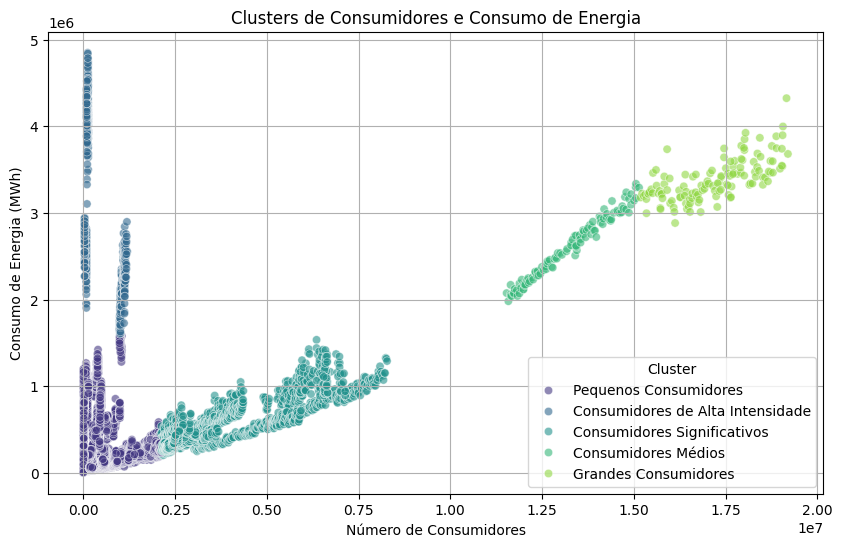

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_corr, 
    x="numero_consumidores", 
    y="consumo", 
    hue="cluster_label",  # Usar os rótulos aqui
    palette="viridis", 
    alpha=0.6
)

# Adicionar título e rótulos aos eixos
plt.title("Clusters de Consumidores e Consumo de Energia")
plt.xlabel("Número de Consumidores")
plt.ylabel("Consumo de Energia (MWh)")
plt.legend(title="Cluster")
plt.grid(True)

plt.show()


# **Resumo Final**  

A análise do dataset revela uma **queda no consumo de energia no mercado cativo a partir de 2015**, refletindo os impactos da portabilidade da conta de energia e evidenciando mudanças no comportamento do setor.  

Por outro lado, ao observar a **"Evolução do consumo ao longo dos anos"**, percebe-se um **crescimento expressivo no mercado não cativo**, indicando uma migração significativa de consumidores para esse modelo.  

## **Consumo por Estado e Região**  

No recorte estadual, os cinco estados com maior consumo de energia estão localizados nas regiões **Sudeste e Sul**. Um destaque interessante é o estado do **Paraná**, que em 2004 ocupava a **quinta posição** e, em 2023, subiu para **quarta**, aproximando-se do **Rio de Janeiro**, o terceiro maior consumidor. O **sexto estado com maior demanda está na região Nordeste**, possivelmente por ser o mais populoso. Essa distribuição é confirmada pelo gráfico de **"Consumo total de energia por região"**, que evidencia a predominância dessas localidades no consumo energético nacional.  

Ao comparar os anos **2004 e 2023**, nota-se que as regiões **Sudeste e Sul continuam liderando o consumo de energia**. Um ponto interessante é que, em 2023, a **região Centro-Oeste ultrapassou a região Norte** em consumo energético.  

## **Padrões Regionais e Evolução ao Longo do Tempo**  

Uma análise mais detalhada por região revela **padrões bem definidos** no consumo energético, com estados de maior demanda exercendo forte influência. Comparando **2004 e 2023**, foi identificado:  

- **Região Norte**: O estado do **Pará** apresentou um forte crescimento no consumo.  
- **Região Nordeste**: O estado da **Bahia** se destaca pelo aumento expressivo no consumo, enquanto os estados do **Ceará, Maranhão e Pernambuco, em 2023, atingiram níveis de consumo semelhantes ao da Bahia em 2004**.  
- **Região Centro-Oeste**: O estado de **Goiás** teve um crescimento significativo no consumo de energia.  
- **Região Sudeste**: O estado de **São Paulo manteve a liderança** em consumo nos dois períodos analisados.  
- **Região Sul**: O **Paraná se destacou**, subindo no ranking de consumo de energia.  

## **Impacto da Pandemia (2018-2023)**  

Para avaliar o impacto da **pandemia da COVID-19 no consumo de energia**, foi feito um recorte de **2018 a 2023**. Observa-se que **três regiões apresentaram queda no consumo**:  

- **Sudeste**  
- **Sul**  
- **Nordeste**  

Enquanto isso, **duas regiões tiveram aumento** no consumo de energia no mesmo período.  

## **Segmentação de Consumidores com K-Means**  

Para compreender melhor a relação entre **número de consumidores e consumo de energia**, foi gerado um **scatterplot**, que indicou uma **correlação positiva de 0.45**, embora não linear em todas as faixas.  

Foi aplicado o **algoritmo K-Means** para segmentar os dados. O primeiro teste com **3 clusters** não apresentou uma segmentação satisfatória. Após ajustes, foi encontrado um melhor agrupamento com **5 clusters**, classificados como:  

- **Cluster 0**: Pequeno número de consumidores e baixo consumo → **"Pequenos Consumidores"**.  
- **Cluster 1**: Número de consumidores muito alto e consumo elevado → **"Grandes Consumidores"**.  
- **Cluster 2**: Valores intermediários → **"Consumidores Médios"**.  
- **Cluster 3**: Consumo elevado, mas menor que os "Grandes Consumidores" → **"Consumidores Significativos"**.  
- **Cluster 4**: Consumo alto, porém com um número muito pequeno de consumidores → **"Consumidores de Alta Intensidade"**.  

## **Conclusão**  

A análise revelou **mudanças estruturais no mercado de energia**, com **queda no consumo cativo** e **crescimento no mercado não cativo**. Verificou-se **mudanças regionais**, como a ascensão do **Paraná e Goiás**, e o impacto da pandemia, que afetou o consumo de forma desigual entre as regiões. A segmentação dos consumidores com **K-Means** permitiu classificar padrões de consumo, oferecendo uma visão mais granular do comportamento do setor.


# Funções

## Interface gráfica para adicionar arquivos no jupyter notebook sem sofre com caminhos. :D

In [ ]:
import pandas as pd
import tkinter as tk
from tkinter import filedialog, messagebox
from tkinter import ttk

# Função principal para carregar e exibir o arquivo CSV
def carregar_e_exibir_csv():
    dataframe = None  # Variável para armazenar o DataFrame

    # Função para carregar o arquivo CSV
    def carregar_arquivo():
        nonlocal dataframe
        # Abre a janela para o usuário escolher um arquivo CSV
        arquivo = filedialog.askopenfilename(
            title="Selecione o arquivo CSV", 
            filetypes=[("CSV Files", "*.csv")]
        )
        if arquivo:
            try:
                # Obtém o separador e a codificação definidos pelo usuário
                separador = separador_var.get()
                encoding = encoding_var.get()
                # Carrega o arquivo CSV no DataFrame
                dataframe = pd.read_csv(arquivo, sep=separador, encoding=encoding)
                messagebox.showinfo("Sucesso", "Arquivo carregado com sucesso!")
                # Exibe os dados na interface gráfica
                exibir_dados(dataframe)
            except Exception as e:
                messagebox.showerror("Erro", f"Erro ao carregar o arquivo:\n{e}")
        else:
            messagebox.showwarning("Aviso", "Nenhum arquivo selecionado.")

    # Função para exibir os dados no Treeview
    def exibir_dados(df):
        # Limpa os dados existentes no Treeview antes de exibir os novos
        for item in tree.get_children():
            tree.delete(item)
        # Configura o Treeview com as colunas do DataFrame
        tree["columns"] = list(df.columns)
        tree["show"] = "headings"
        for col in df.columns:
            tree.heading(col, text=col)  # Define o título das colunas
            tree.column(col, anchor="w")  # Alinha as colunas à esquerda
        # Insere as linhas de dados no Treeview
        for index, row in df.iterrows():
            tree.insert("", "end", values=list(row))

    # Função para enviar o DataFrame para o Jupyter Notebook
    def enviar_para_notebook():
        nonlocal dataframe
        if dataframe is not None:
            messagebox.showinfo("Sucesso", "Arquivo enviado para o Jupyter Notebook!")
            # Fecha a janela do Tkinter após enviar os dados
            root.destroy()
        else:
            messagebox.showwarning("Aviso", "Nenhum arquivo carregado. Carregue um arquivo primeiro.")

    # Interface gráfica Tkinter
    root = tk.Tk()
    root.title("Carregar Arquivo CSV")
    root.geometry("800x600")

    # Frame para opções de separador e codificação
    frame_opcoes = tk.Frame(root)
    frame_opcoes.pack(pady=10, side="top", fill="x")

    tk.Label(frame_opcoes, text="Separador:").grid(row=0, column=0, padx=5)
    separador_var = tk.StringVar(value=",")
    tk.Entry(frame_opcoes, textvariable=separador_var, width=5).grid(row=0, column=1, padx=5)

    tk.Label(frame_opcoes, text="Codificação:").grid(row=0, column=2, padx=5)
    encoding_var = tk.StringVar(value="utf-8")
    tk.Entry(frame_opcoes, textvariable=encoding_var, width=10).grid(row=0, column=3, padx=5)

    # Frame para os botões
    frame_botoes = tk.Frame(root)
    frame_botoes.pack(pady=10, side="top", fill="x")

    # Botão para carregar arquivo
    botao_carregar = tk.Button(frame_botoes, text="Carregar Arquivo", command=carregar_arquivo)
    botao_carregar.pack(side="left", padx=5)

    # Botão para enviar para notebook
    botao_enviar = tk.Button(frame_botoes, text="Enviar para Notebook", command=enviar_para_notebook)
    botao_enviar.pack(side="left", padx=5)

    # Treeview para exibir dados
    tree = ttk.Treeview(root)
    tree.pack(expand=True, fill="both", pady=10)

    # Inicia o loop da interface gráfica
    root.mainloop()

    return dataframe  # Retorna o DataFrame após o loop

# Função para iniciar no Jupyter
if __name__ == "__main__":
    df_jupyter = carregar_e_exibir_csv()  # Captura o DataFrame retornado
    print(df_jupyter.head())  # Exibe as primeiras linhas do DataFrame no Jupyter


## Streamlit para visualizar dataframe, info(), describe(), duplicated().sum() e isna().sum()

In [ ]:
import os
import pandas as pd
import streamlit as st
from tkinter import Tk, filedialog, messagebox
import os  # Para usar os._exit()

# Definindo algumas cores suaves para as mensagens
SUCCESS_COLOR = "background-color: #e9f7ef; color: #2d6a4f;"  # Verde claro para sucesso

WARNING_COLOR = "background-color: #ffcc80; color: #663c00;"  # Laranja suave para alertas
ERROR_COLOR = "background-color: #f8d7da; color: #721c24;"    # Vermelho suave para erros

# Função para selecionar múltiplos diretórios com Tkinter
def select_directories():
    root = Tk()
    root.withdraw()  # Oculta a janela principal do Tkinter
    messagebox.showinfo("Bem-vindo", "Bem-vindo ao seletor de diretórios!")

    directories = []
    while True:
        directory = filedialog.askdirectory(title="Selecione um diretório")
        if directory:
            directories.append(directory)
            msg = f"Diretório selecionado: {directory}\n\nDeseja selecionar mais algum diretório?"
            if not messagebox.askyesno("Selecionar mais", msg):
                break
        else:
            break

    root.destroy()  # Fecha o contexto do Tkinter
    return directories

# Função para listar todos os arquivos CSV em um diretório e seus subdiretórios
def get_all_csv_files(directory):
    csv_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".csv"):
                csv_files.append(os.path.join(root, file))
    return csv_files

# Função para carregar os diretórios usando cache do Streamlit
@st.cache_data
def load_directories():
    return select_directories()

# Função para verificar dados ausentes
def verifica_dados_ausentes(file_name, df):
    df_cleaned = df.drop(columns=[col for col in df.columns if 'Unnamed' in col], errors='ignore')

    missing_data = df_cleaned.isnull().sum()
    missing_info = missing_data[missing_data > 0]

    if missing_info.empty:
        st.markdown(f"<div style='{SUCCESS_COLOR}'>Arquivo: {file_name}<br>Não foram encontrados dados ausentes.</div>", unsafe_allow_html=True)
    else:
        missing_info_formatted = missing_info.to_frame(name="Dados Ausentes")
        missing_info_formatted.index.name = 'Coluna'

        st.markdown(f"<div style='{WARNING_COLOR}'>Arquivo: {file_name}<br>Dados Ausentes:</div>", unsafe_allow_html=True)
        st.dataframe(missing_info_formatted)

        total_missing = missing_info.sum()
        st.markdown(f"<div style='{WARNING_COLOR}'>Total de dados ausentes: {total_missing:,}</div>", unsafe_allow_html=True)

# Função para verificar dados duplicados
def verifica_dados_duplicados(file_name, df):
    df_cleaned = df.drop(columns=[col for col in df.columns if 'Unnamed' in col], errors='ignore')

    #duplicated_data = df_cleaned[df_cleaned.duplicated()]
    duplicated_data = df_cleaned[df_cleaned.duplicated(keep=False)]


    if duplicated_data.empty:
        st.markdown(f"<div style='{SUCCESS_COLOR}'>Arquivo: {file_name}<br>Não foram encontrados dados duplicados.</div>", unsafe_allow_html=True)
    else:
        st.markdown(f"<div style='{WARNING_COLOR}'>Arquivo: {file_name}<br>Dados Duplicados:</div>", unsafe_allow_html=True)
        st.dataframe(duplicated_data)

        total_duplicated = duplicated_data.shape[0]
        st.markdown(f"<div style='{WARNING_COLOR}'>Total de dados duplicados: {total_duplicated:,}</div>", unsafe_allow_html=True)

# Função para encerrar o servidor Streamlit de forma controlada
def stop_streamlit():
    st.warning("Servidor encerrado...")
    os._exit(0)  # Encerra o processo Python do Streamlit imediatamente

# Início do programa
st.title("Explorador de Dados Personalizado")

selected_dirs = load_directories()

if not selected_dirs:
    st.warning("Nenhum diretório foi selecionado. Por favor, reinicie o aplicativo e escolha pelo menos um diretório.")
else:
    directories = {os.path.basename(dir_path): dir_path for dir_path in selected_dirs}

    category_option = st.sidebar.selectbox(
        "Escolha a pasta:",
        list(directories.keys())
    )

    if category_option:
        selected_dir = directories[category_option]

        csv_files = get_all_csv_files(selected_dir)

        if csv_files:
            file_option = st.sidebar.selectbox(
                "Escolha um arquivo:",
                [os.path.relpath(f, selected_dir) for f in csv_files]
            )

            if file_option:
                file_path = os.path.join(selected_dir, file_option)

                try:
                    # Tenta detectar a codificação correta do arquivo
                    encodings = ["utf-8", "latin1", "ISO-8859-1", "cp1252"]
                    for encoding in encodings:
                        try:
                            df = pd.read_csv(file_path, encoding=encoding, sep=None, engine="python")
                            break
                        except Exception:
                            continue

                    view_option = st.sidebar.radio(
                        "Escolha a visualização:",
                        ("Visualizar Dados", "Informações Gerais", "Estatísticas Descritivas", "Verificar Dados Ausentes", "Verificar Dados Duplicados")
                    )

                    if view_option == "Visualizar Dados":
                        st.dataframe(df)
                    elif view_option == "Informações Gerais":
                        st.markdown(f'<h3>Informações Gerais sobre: {file_option}</h3>', unsafe_allow_html=True)

                        st.write("### Estrutura do DataFrame:")
                        st.write(f"- **Número de Linhas**: {df.shape[0]:,}".replace(",", "."))
                        st.write(f"- **Número de Colunas**: {df.shape[1]:,}".replace(",", "."))
                        st.write(f"- **Uso de Memória**: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

                        info_df = pd.DataFrame({
                            "Coluna": df.columns,
                            "Não Nulos": [f"{val:,}".replace(",", ".") for val in df.notnull().sum()],
                            "Tipo de Dado": df.dtypes.astype(str)
                        })
                        st.dataframe(info_df)

                        st.write("### Primeiras Linhas do DataFrame:")
                        st.dataframe(df.head())

                    elif view_option == "Estatísticas Descritivas":
                        st.markdown(f'<h3>Estatísticas Descritivas de: {file_option}</h3>', unsafe_allow_html=True)
                        st.write(df.describe())

                    elif view_option == "Verificar Dados Ausentes":
                        st.markdown(f'<h3>Verificando Dados Ausentes em: {file_option}</h3>', unsafe_allow_html=True)
                        verifica_dados_ausentes(file_option, df)

                    elif view_option == "Verificar Dados Duplicados":
                        st.markdown(f'<h3>Verificando Dados Duplicados em: {file_option}</h3>', unsafe_allow_html=True)
                        verifica_dados_duplicados(file_option, df)

                except Exception as e:
                    st.markdown(f"<div style='{ERROR_COLOR}'>Erro ao carregar o arquivo: {e}</div>", unsafe_allow_html=True)
        else:
            st.warning("Nenhum arquivo CSV encontrado no diretório selecionado e seus subdiretórios.")

# Botão para encerrar o servidor Streamlit na barra lateral
if st.sidebar.button("Encerrar o Streamlit"):
    stop_streamlit()  # Chama a função que encerra o Streamlit de forma controlada
